In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv('dulieuxettuyendaihoc.csv',header = 0, delimiter=',', encoding='UTF-8')
df


,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [4]:
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]

In [5]:
# Data Manipulation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GT                   100 non-null    object 
 1   DT                   3 non-null      float64
 2   KV                   100 non-null    object 
 3   KT                   100 non-null    object 
 4   M1                   100 non-null    float64
 5   M2                   100 non-null    float64
 6   M3                   100 non-null    float64
 7   NGAYTHI              100 non-null    object 
 8   DINHHUONGNGHENGHIEP  100 non-null    object 
dtypes: float64(4), object(5)
memory usage: 7.2+ KB


In [5]:
df.rename(columns={'NGAYTHI':'NT','DINHHUONGNGHENGHIEP':'NGHE'},inplace=True)

In [3]:
df.head(5)

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No


In [2]:
# bỏ hết dòng bị trống
df.dropna(how='all', inplace=True) # bỏ trực tiếp vô dataframe

In [6]:
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [3]:
# xóa bỏ dòng bị trùng
df.drop_duplicates(inplace=True)

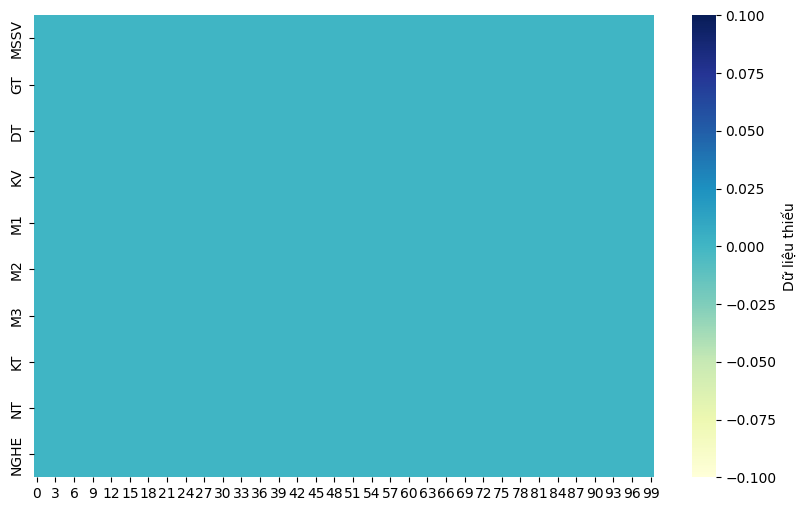

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
# heat map là mức độ độ lớn của dữ liệu
# căn cứ vào màu sắc để biểu thị độ thiếu của dữ liệu
# phần màu vàng là có dữ liệu
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [ ]:
# kĩ thuật điền dữ liệu bị thiếu
df['DT'].fillna('KINH', inplace=True) # điền giá trị cố định cho dữ liệu thiếu
# có thể sử dụng giá trị mode

In [15]:
#điền giá trị thiếu bằng giá trị trung bình
df['M1'].fillna(df['M1'].mean(), inplace=True)
# tự nghiên cứu điền thiếu M1 bằng phương pháp nội suy, dùng có dữ liệu có tính tuần tự

<Figure size 640x480 with 0 Axes>

In [16]:
#điền giá trị thiếu bằng trung vị
df['M2'].fillna(df['M2'].median(), inplace=True)

In [ ]:
#điền giá trị thiếu bằng số 0
df['M3'].fillna(0, inplace=True)

In [9]:
# thao tác dữ liệu với pandas
#bỏ thêm cột mới bằng các dữ liệu thô bang đầu
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3

In [10]:
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333
...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667


In [11]:
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

df.loc[(df['TBM'] >= 5.0) & 
       (df['TBM'] < 7.0), 'XL'] = 'FAIR'

df.loc[(df['TBM'] >= 7.0) & 
       (df['TBM'] < 9.0), 'XL'] = 'GOOD'

df.loc[df['TBM'] >= 9.0, 'XL'] = 'EXCEL'


In [12]:
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL
...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL


In [13]:
#tạo biến nhóm 
dict_map = {
    'A1':'G1', 'C':'G3', 'D1': 'G3', 'A': 'G1', 'B': 'G2'
}
df['NHOM'] = df['KT'].map(dict_map)
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3


In [14]:
# nếu NHOM thuộc nhóm G1 và G2 và TBM >=5 thì là 1.0
# ngược lại là 0
def fplus(x,y):
    if (x == 'G1' or x == 'G2') and (y >= 4.0):
        return 1.0
    else:
        return 0.0

df['PLUS'] = list(map(fplus,df['NHOM'],df['TBM']))

In [15]:
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NT,NGHE,TBM,XL,NHOM,PLUS
0,SV001,F,KINH,2NT,3.25,3.25,4.50,A1,12/7/2018,No,3.666667,FAIL,G1,0.0
1,SV002,M,KINH,1,6.00,4.00,3.50,C,12/7/2018,Yes,4.500000,FAIL,G3,0.0
2,SV003,M,KINH,1,5.00,6.75,4.00,C,12/7/2018,No,5.250000,FAIR,G3,0.0
3,SV004,M,KINH,1,4.25,4.25,5.25,D1,12/7/2018,No,4.583333,FAIL,G3,0.0
4,SV005,M,KINH,2NT,4.25,4.50,5.00,A,12/7/2018,No,4.583333,FAIL,G1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,KINH,1,5.25,1.50,6.25,C,7/20/2022,Yes,4.333333,FAIL,G3,0.0
96,SV0097,F,KINH,1,5.25,3.75,4.75,C,7/20/2022,No,4.583333,FAIL,G3,0.0
97,SV0098,M,KINH,2NT,7.00,8.00,4.00,C,7/20/2022,Yes,6.333333,FAIR,G3,0.0
98,SV0099,M,KINH,1,5.00,3.50,5.50,C,7/20/2022,No,4.666667,FAIL,G3,0.0


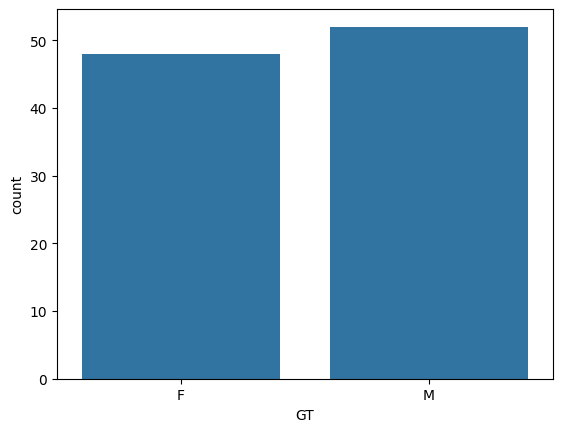

In [16]:
# Data Visualization EDA
sns.countplot(x='GT', data=df)
plt.show()
# trực quan hóa số lượng học sinh theo giới tính
# nam nhiều hơn nữ

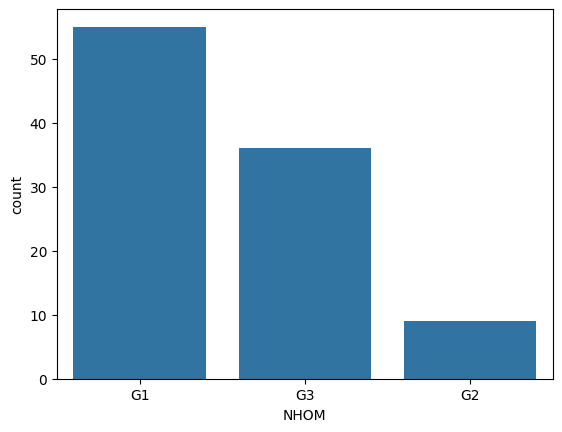

In [17]:
""""
sinh viên tự làm tương tự cột DT, NHOMKT
--> dựa trên biểu đồ 

"""
sns.countplot(x='NHOM', data=df)
plt.show()


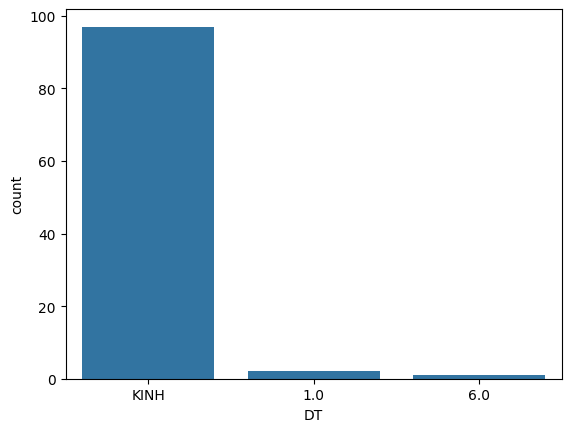

In [18]:
sns.countplot(x='DT', data=df)
plt.show()

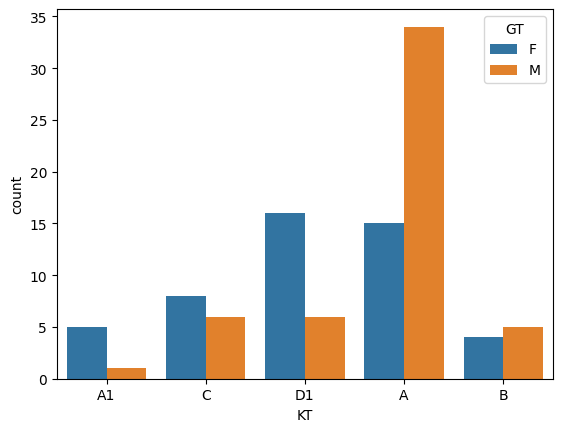

In [19]:
sns.countplot(x='KT', hue='GT',data=df) #hue là định tính
plt.show()

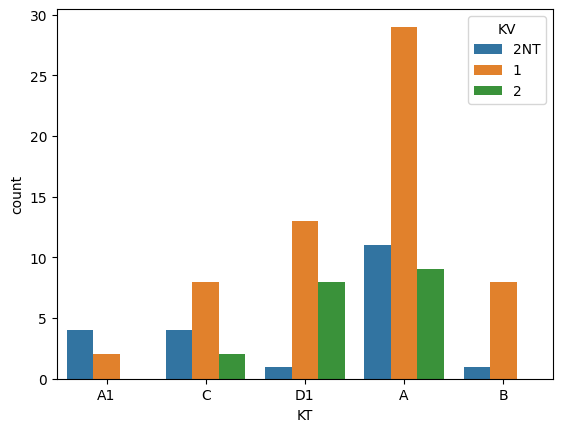

In [20]:
#sinh viên khối A thuộc khối KV 1 nhiều nhất
sns.countplot(x='KT', hue='KV',data=df) #hue là định tính
plt.show()

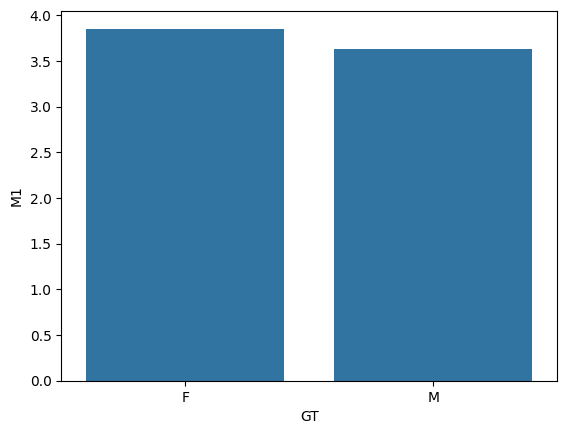

In [8]:
#so sánh điểm trung bình điểm môn 1 theo từng nhóm giới tính
sns.barplot(x='GT', y='M1', data=df, errorbar=None)
plt.show()

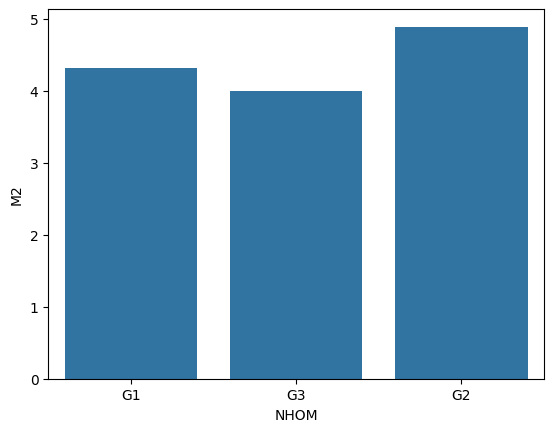

In [22]:
#so sánh điểm trung bình điểm môn 2 theo từng nhóm NHOM
sns.barplot(x='NHOM', y='M2', data=df, errorbar=None)
plt.show()

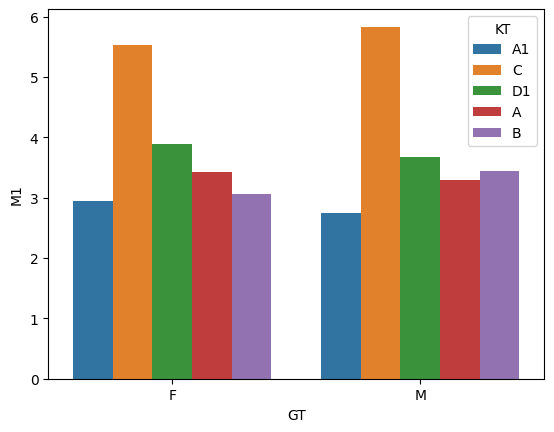

In [23]:
# so sánh điểm thi môn 1 của 2 giới tính qua từng khối thi
sns.barplot(x='GT', y='M1', hue='KT', data=df, errorbar=None)
plt.show()


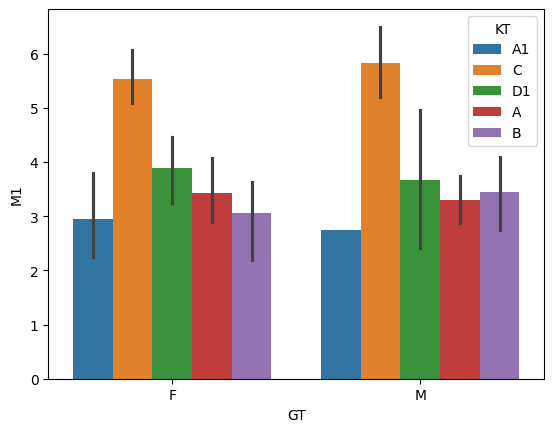

In [25]:
#so sánh sau số trên M1 theo nhóm 
sns.barplot(x='GT', y='M1', hue='KT', data=df)
plt.show()

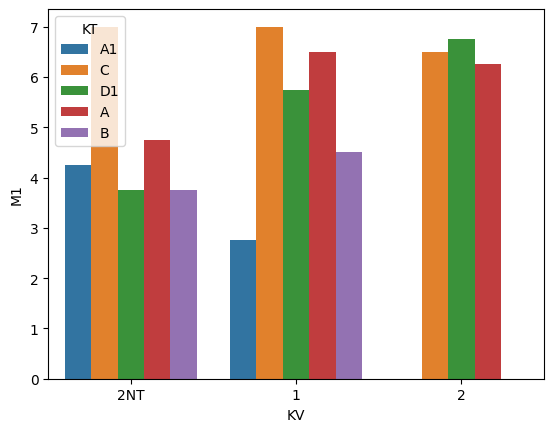

In [26]:
import numpy as np
sns.barplot(x='KV', y='M1', hue='KT', 
            data=df, errorbar=None, estimator=np.max)
#estimator=np.max chiều cao của biểu đồ là giá trị lớn nhất
plt.show()

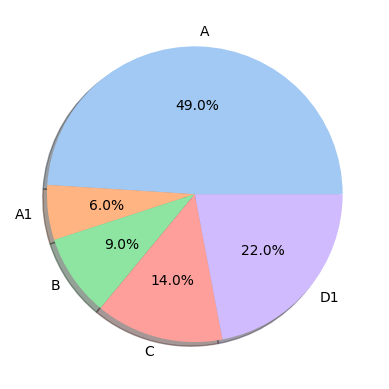

In [27]:
#tỉ lệ phần trăm của các biến khối thi

gb = df.groupby(['KT'])['KT'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()


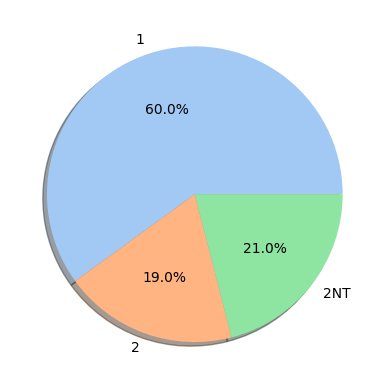

In [28]:
# thống kê tỉ lệ phần trăm cho KV
gb = df.groupby(['KV'])['KV'].agg(['count'])

labels = gb.index # labels = ['A','A1','B','C','D1']
data = list(gb['count']) # data= [49,6,9,14,22]

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

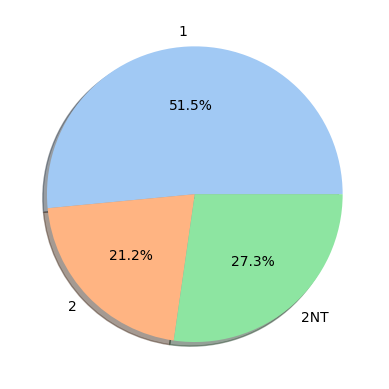

In [29]:
# tỉ lệ phần trăm Khu vực được cộng điểm nhiều nhất

gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

colors = sns.color_palette('pastel') # Tạo bảng màu

plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

plt.show()

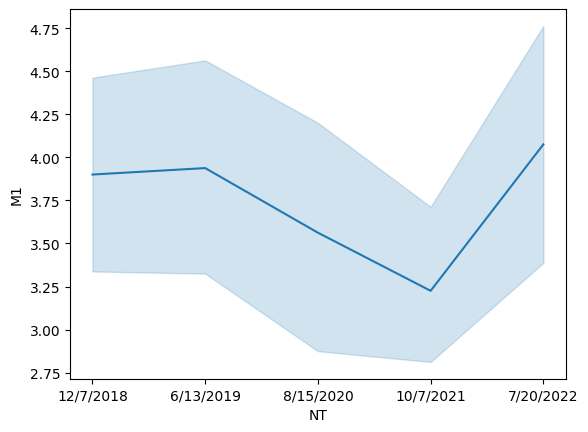

In [30]:
#trug bình điểm thi của Môn 1 theo ngày

sns.lineplot(x='NT', y='M1', data=df)
plt.show()

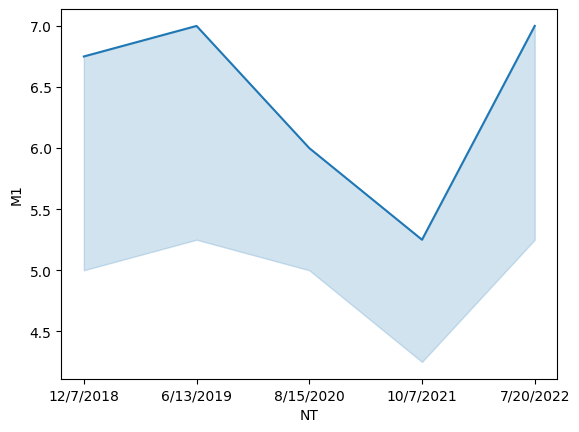

In [31]:
# điểm thi lớn nhất theo ngày estimator=np.max
sns.lineplot(x='NT', y='M1', data=df, estimator=np.max)
plt.show()

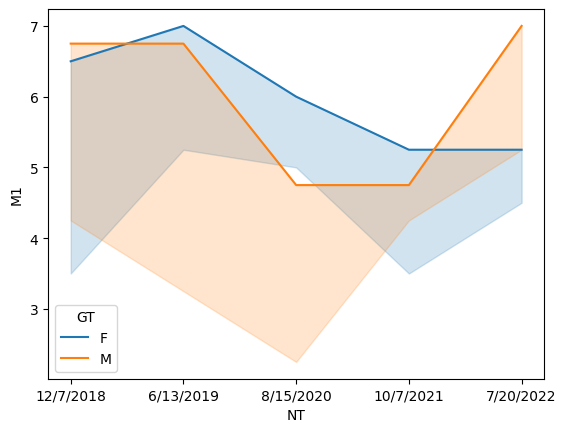

In [32]:
#Ngày nào điểm thi M1 của Nam lớn nhất và lớn hơn nữ
sns.lineplot(x='NT', y='M1', hue='GT', 
             data=df, estimator=np.max)
plt.show()

In [33]:
print(f'{df["M1"].min()} \n {df["M1"].max} \n')
print(f'{df["M1"].mean()} \n {df["M1"].median}')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3051764266.py, line 1)

In [34]:
df['M1'].max() - df["M1"].min()

np.float64(6.0)

In [35]:
#IQR
df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

np.float64(2.25)

In [36]:
#độ lệch trung bunh
np.mean(np.abs(df['M1']-np.mean(df['M1'])))

np.float64(1.1600000000000001)

In [38]:
#tính phân vị thứ 9 gọi là p9 trong thập phân vị cho M1 và M2
df['M1'].quantile(0.9)



np.float64(5.300000000000004)

In [39]:
#tính khoảng range cho M1 và M2
df[['M1', 'M2']].max() - df[['M1', 'M2']].min()

M1    6.0
M2    6.5
dtype: float64

In [ ]:
# tính khoảng IQR cho M1 và M2
df['M1'].quantile(0.75) - df['M1'].quantile(0.25)

In [ ]:
# tính độ lệch chuẩn trung bình cho M1 và M2


In [ ]:
#tuần sau (tuần 3 học thống kê suy diễn)